# Assignment - 15
# Neural Networks
# Question 2
forest fire data

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
# loading dataset
forestfire_data = pd.read_csv('forestfires.csv')
forestfire_data 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [4]:
forestfire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forestfire_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')  

## Data Visualization

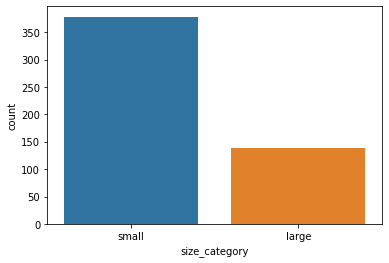

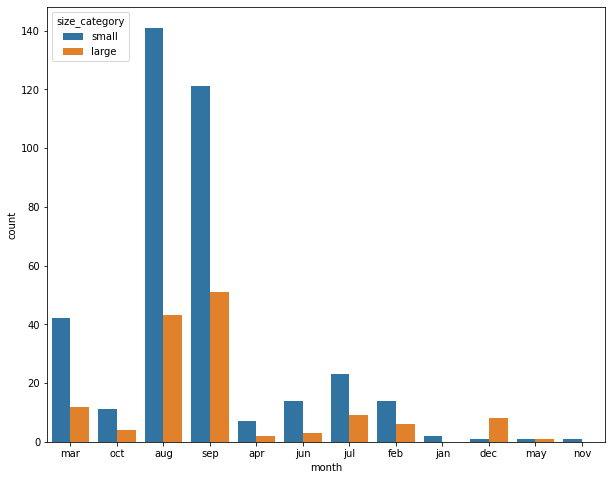

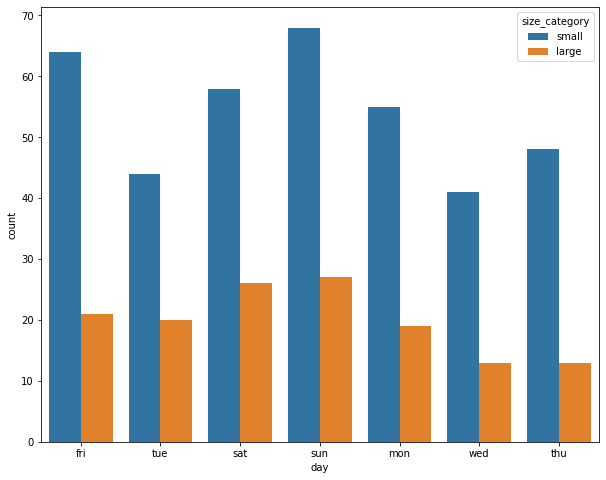

In [9]:
sns.countplot(forestfire_data['size_category'])
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show() 

plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show() 

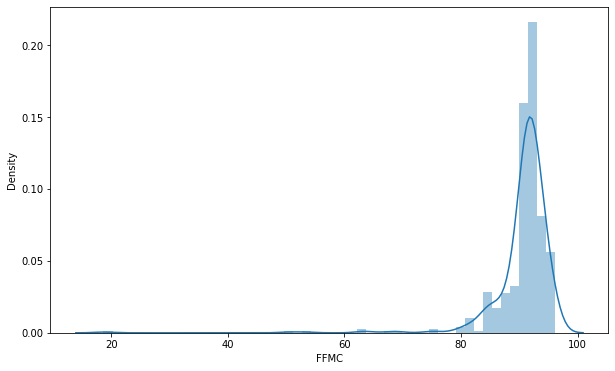

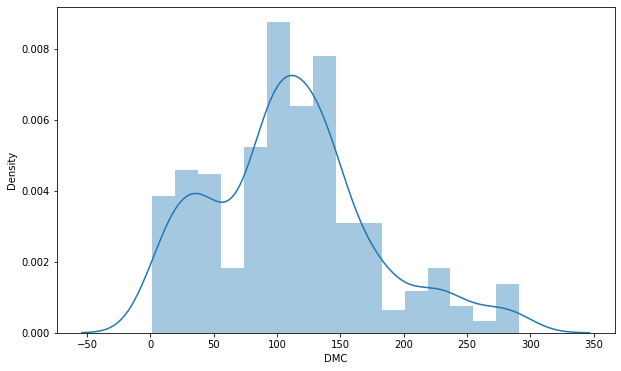

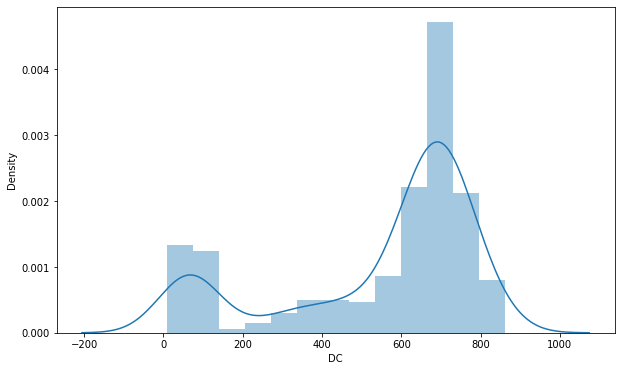

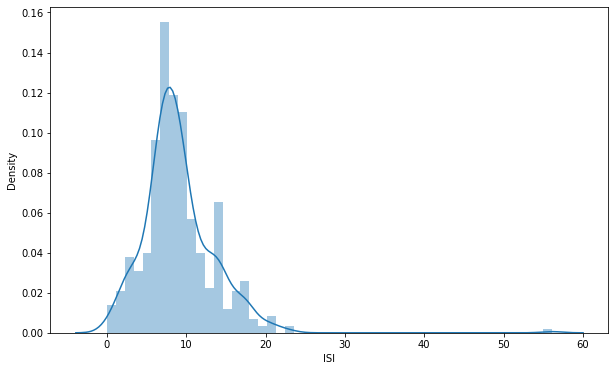

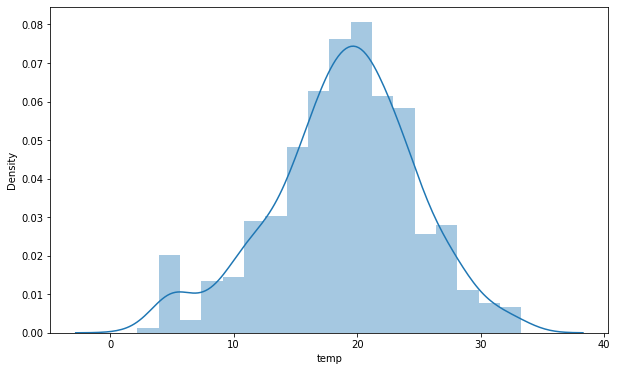

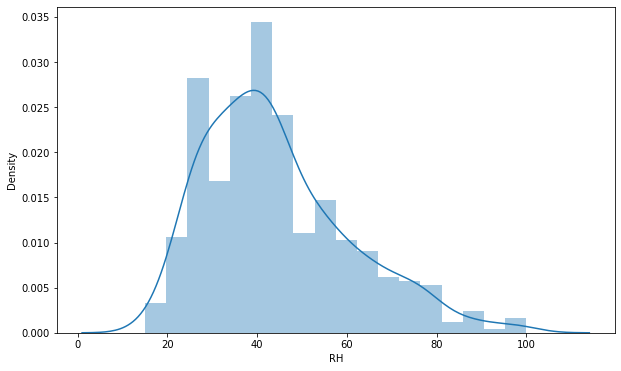

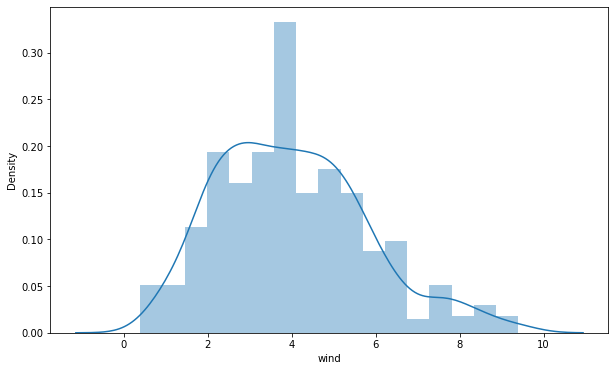

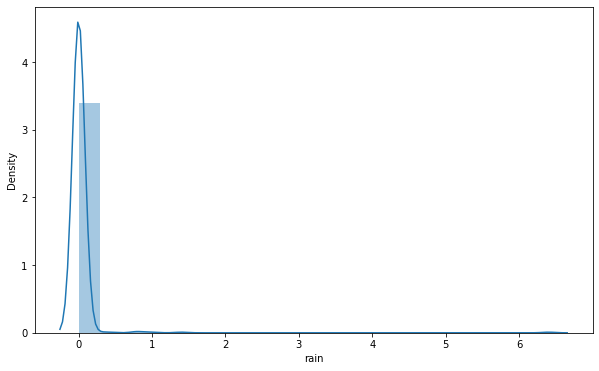

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['FFMC'],)
plt.show() 

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DC'],)
plt.show()


plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['RH'],)
plt.show() 

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['rain'],)
plt.show() 

In [11]:
drop_data = forestfire_data.drop(labels=['month','day'],axis = 1)
drop_data 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
le = LabelEncoder()
drop_data['size_category'] = le.fit_transform(drop_data['size_category'])
drop_data  

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


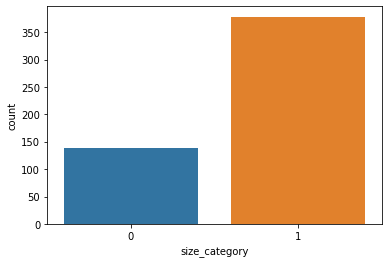

In [13]:
sns.countplot(drop_data['size_category']) 
plt.show() 

In [14]:
drop_data['size_category'].replace({'small':0,'large':0},inplace = True) 

In [15]:
drop_data 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


## Correlation

In [16]:
corr=drop_data.corr()
corr 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


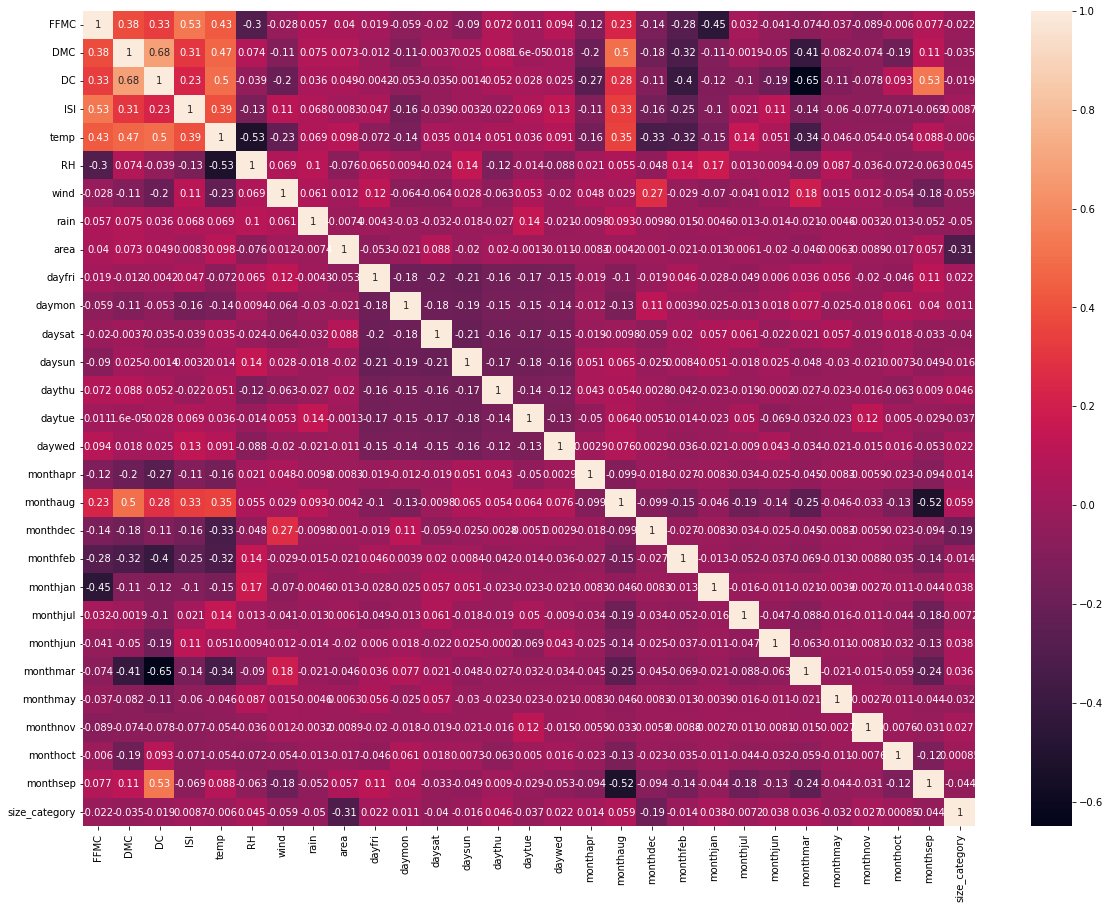

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show() 

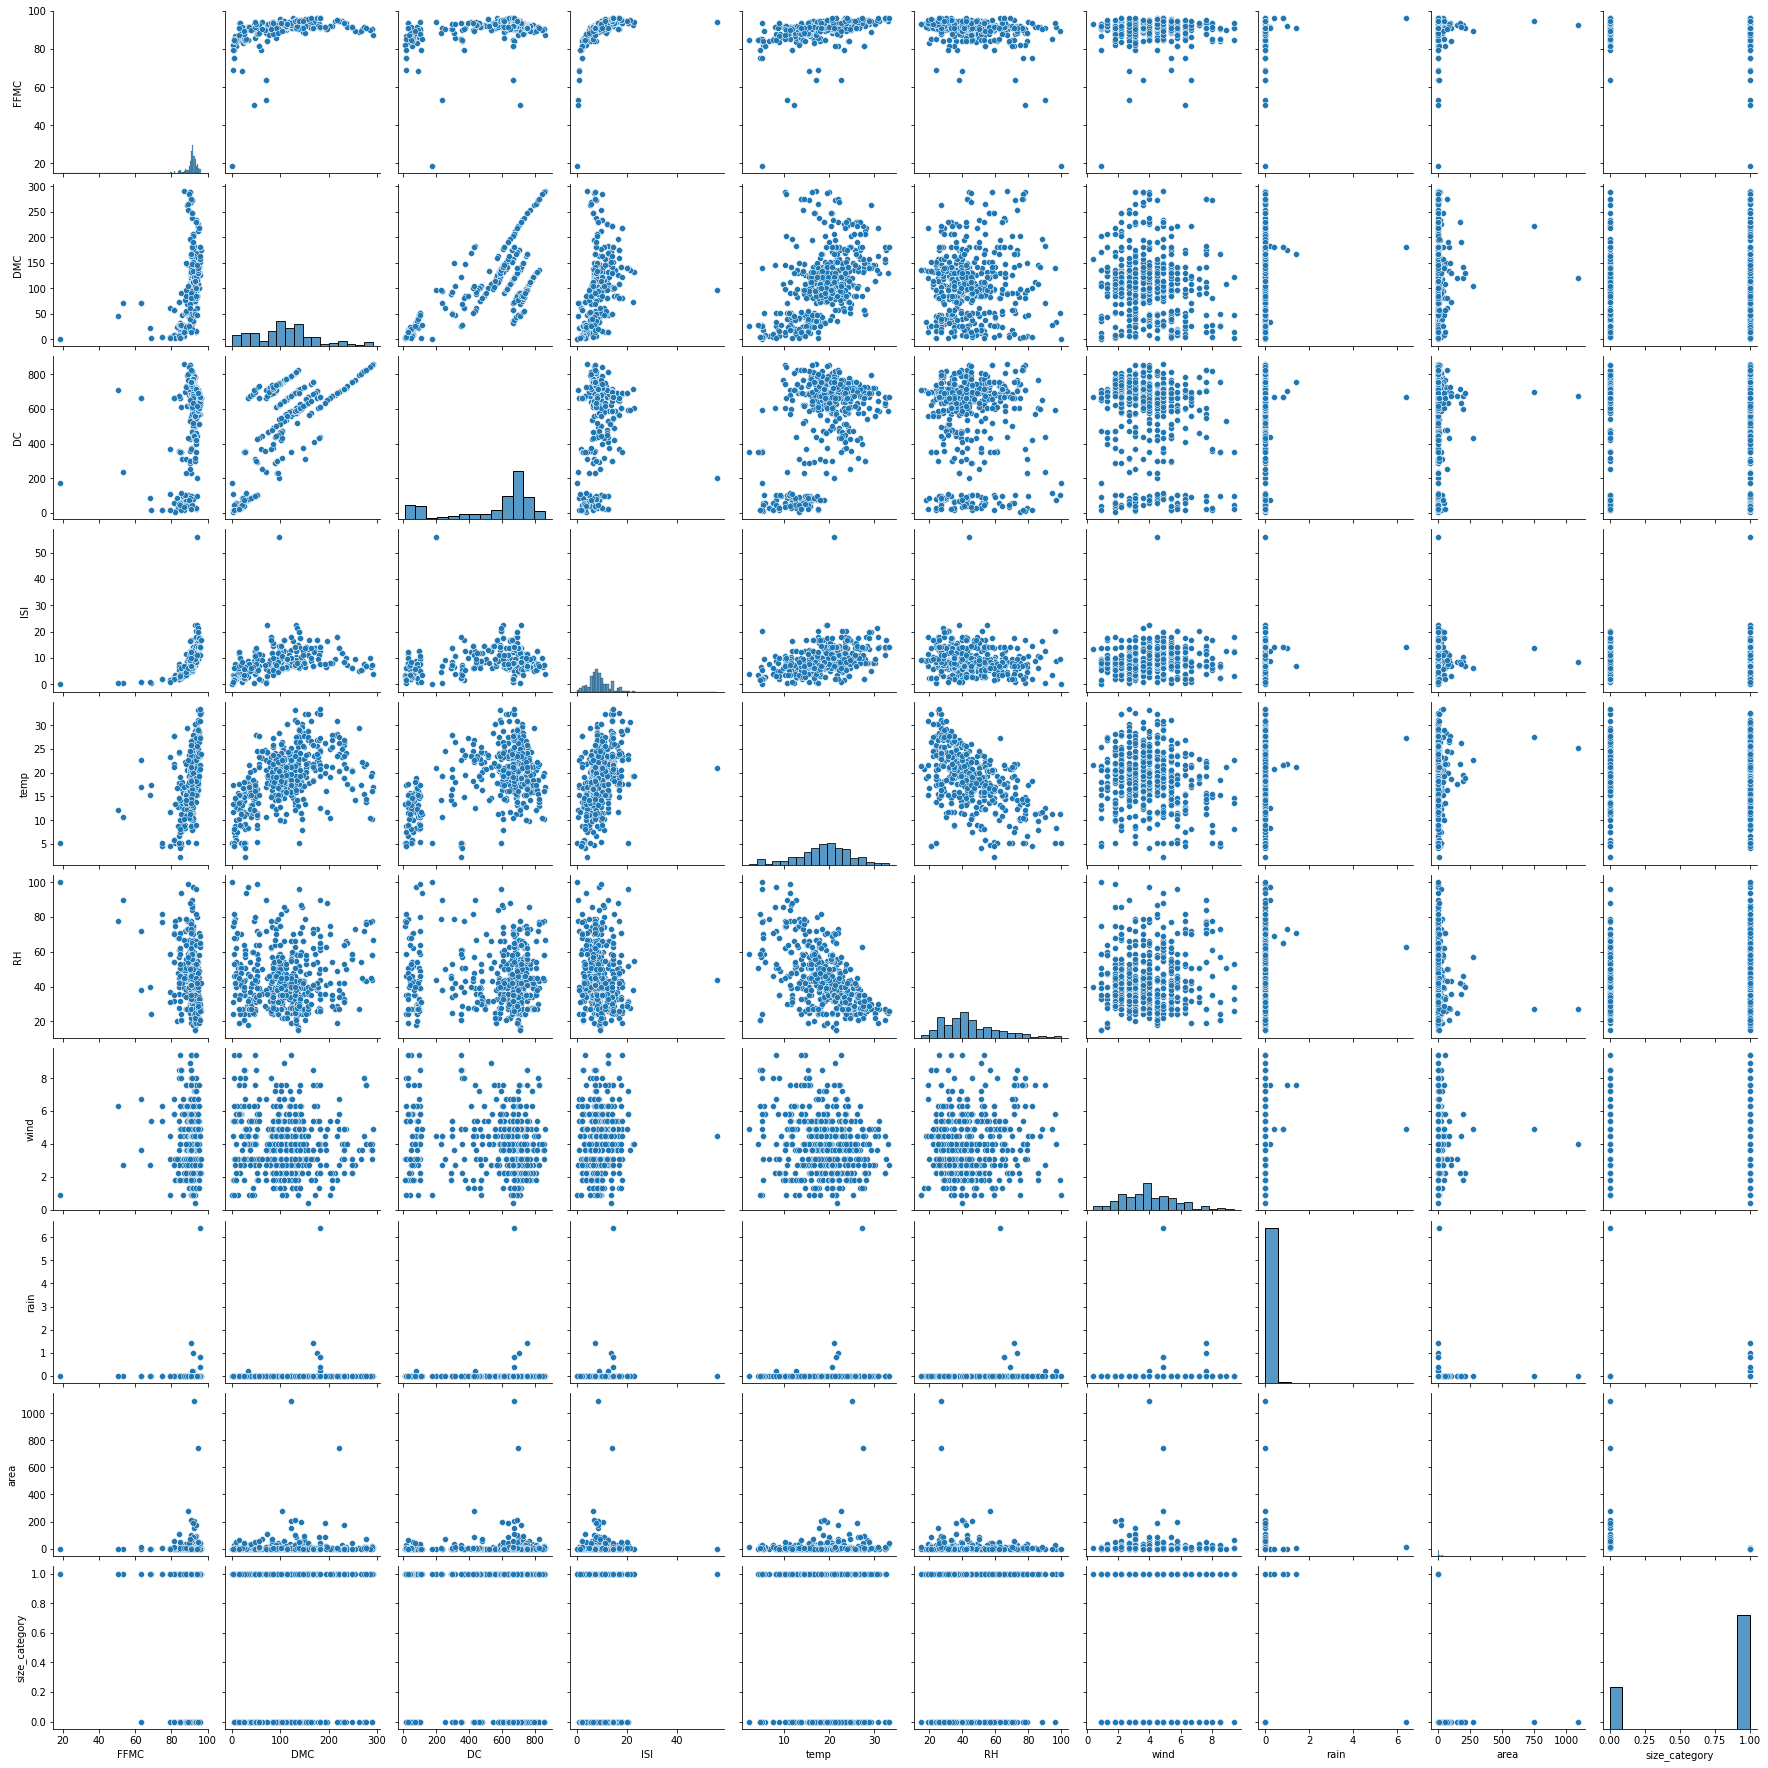

In [18]:
pair_data = pd.concat([drop_data.iloc[:,0:9],drop_data.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()
 

# Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression  

In [20]:
x = drop_data.drop(labels='size_category',axis = 1)
y = drop_data[['size_category']] 

In [21]:
x 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [23]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12) 

In [24]:
x_train.shape,y_train.shape 

((361, 28), (361, 1))

In [25]:
y_train.shape,y_train.shape 

((361, 1), (361, 1))

Data Is Imbalance so we have to balance it , so using here smote operation of balancing technique¶

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE 

In [27]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [28]:
x_train_sm.shape,y_train_sm.shape

((538, 28), (538,))

In [29]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()


In [30]:
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,93.700000,101.300000,458.800000,11.900000,19.300000,39,7.200000,0.0,7.730000,0,...,0,0,0,1,0,0,0,0,0,0
1,92.800000,119.000000,783.500000,7.500000,16.800000,28,4.000000,0.0,7.210000,0,...,0,0,0,0,0,0,0,0,0,1
2,92.100000,152.600000,658.200000,14.300000,20.200000,47,4.000000,0.0,3.090000,0,...,0,0,0,0,0,0,0,0,0,0
3,93.700000,101.300000,423.400000,14.700000,26.100000,45,4.000000,0.0,7.360000,0,...,0,0,0,1,0,0,0,0,0,0
4,90.800000,41.900000,89.400000,7.900000,13.300000,42,0.900000,0.0,7.400000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,91.372665,137.325971,680.945740,9.473142,16.000477,58,5.690184,0.0,10.572590,0,...,0,0,0,0,0,0,0,0,0,0
534,87.307221,10.323502,25.368854,7.059981,9.503587,39,6.480038,0.0,18.149787,0,...,0,0,0,0,0,0,0,0,0,0
535,93.839786,81.878499,686.854129,17.434048,22.477775,30,4.900000,0.0,24.043695,0,...,0,0,0,0,0,0,0,0,0,1
536,91.810487,169.218024,632.028060,10.420531,20.563220,53,3.168242,0.0,13.166840,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Convert Data into standard scale

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train 

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
X_test = scale.fit_transform(x_test)
X_test 

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

# Model Training
#### Tuning of Hyperparameter : Batch size and Epoch

In [42]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [35]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [40]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.213 total time=   3.5s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.685 total time=   2.6s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.537 total time=   2.7s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.271 total time=   2.9s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   3.2s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.796 total time=   3.8s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.713 total time=   3.8s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.731 total time=   7.3s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.822 total time=   3.4s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.944 total time=   7.5s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.833 total time=   7.2s
[CV 2/5] END ..........batch_size=10, epochs=50;,

[CV 4/5] END ..........batch_size=50, epochs=10;, score=0.271 total time=   2.4s


[CV 5/5] END ..........batch_size=50, epochs=10;, score=0.000 total time=   2.8s
[CV 1/5] END ..........batch_size=50, epochs=20;, score=0.213 total time=   1.8s
[CV 2/5] END ..........batch_size=50, epochs=20;, score=0.352 total time=   1.8s
[CV 3/5] END ..........batch_size=50, epochs=20;, score=0.287 total time=   1.9s
[CV 4/5] END ..........batch_size=50, epochs=20;, score=0.271 total time=   1.6s
[CV 5/5] END ..........batch_size=50, epochs=20;, score=0.000 total time=   1.9s
[CV 1/5] END ..........batch_size=50, epochs=50;, score=0.741 total time=   4.1s
[CV 2/5] END ..........batch_size=50, epochs=50;, score=0.694 total time=   2.5s
[CV 3/5] END ..........batch_size=50, epochs=50;, score=0.731 total time=   2.2s
[CV 4/5] END ..........batch_size=50, epochs=50;, score=0.850 total time=   2.5s
[CV 5/5] END ..........batch_size=50, epochs=50;, score=0.607 total time=   3.8s


In [44]:
print(gsv_res.best_params_,gsv_res.best_score_) 

{'batch_size': 10, 'epochs': 50} 0.8440982937812805


In [45]:
#Turning Hyperparameter: Learning rate and Dropout rate
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model 

In [46]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.824 total time=   5.8s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   6.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.824 total time=   6.3s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.729 total time=   6.5s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   5.1s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.861 total time=   5.9s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.806 total time=   5.0s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.213 total time=   5.7s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.897 total time=   6.3s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.991 total time=   6.3s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.843 total time=   6.2s
[CV 2/5] END dropout_rate=0.0, 

In [47]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.2, 'learning_rate': 0.001} 0.847853934764862


# Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [48]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model 

In [49]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.843 total time=  12.0s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.722 total time=   6.0s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.843 total time=   5.1s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.860 total time=   6.5s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.953 total time=   5.7s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.815 total time=  11.4s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.750 total time=   6.4s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   5.4s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.850 total time=   7.6s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.963 total time=   6.1s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.815 total time=   6.5s
[CV 2/5] END Activat

In [50]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.851505720615387 {'Activation_Function': 'tanh', 'init': 'normal'}


### Tuning of Hyperparameter :Number of Neurons in hidden layer

In [51]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model 

In [52]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.852 total time=   7.5s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.778 total time=   5.6s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.861 total time=   6.4s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.888 total time=   5.7s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.972 total time=   8.5s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.870 total time=   6.0s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.796 total time=   6.9s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.861 total time=   5.8s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.897 total time=   7.4s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.963 total time=  11.7s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.852 total time=   6.4s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [53]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.8849082708358764 {'neuron1': 8, 'neuron2': 4}


Train a model with optimum values of hyperparameter

In [54]:
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = tanh
# kernel_initiative = normal
# neuron1 = 8
# neuron2 = 8

In [55]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [56]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train) 

Epoch 1/50
54/54 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6004
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.7007
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7175
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7528
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7788
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.8067
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8253
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8178
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8290
Epoch 11/50
54/54 [

In [57]:
y_predict = model.predict(X_train) 

17/17 [==============================] - 0s 2ms/step


In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_train,y_predict) 

0.9163568773234201

In [60]:
confusion_matrix(y_train,y_predict) 

array([[224,  45],
       [  0, 269]])

In [61]:
print(classification_report(y_train,y_predict)) 

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       269
           1       0.86      1.00      0.92       269

    accuracy                           0.92       538
   macro avg       0.93      0.92      0.92       538
weighted avg       0.93      0.92      0.92       538



In [62]:
# testing data
y_test_pred = model.predict(X_test) 

5/5 [==============================] - 0s 4ms/step


In [63]:
accuracy_score(y_test,y_test_pred) 

0.8461538461538461

In [64]:
confusion_matrix(y_test,y_test_pred) 

array([[45,  2],
       [22, 87]])

In [65]:
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        47
           1       0.98      0.80      0.88       109

    accuracy                           0.85       156
   macro avg       0.82      0.88      0.83       156
weighted avg       0.89      0.85      0.85       156



### Here we created model by using optimum value of hyperparameter, it gives a approximately 90% accuracy score.